---

<center>

# **© [RsydMathTech](https://github.com/RsydMathTech) 2026 All Rights Reserved**

</center>

---


# Human-in-the-Loop Evaluation of LLM Response Quality Using Multi-Dimensional Scoring

## Project Overview
This project evaluates the quality of Large Language Model (LLM) responses using a human-in-the-loop framework.
Responses are assessed across multiple dimensions—accuracy, reasoning quality, relevance, completeness, and hallucination risk—
to understand task-specific performance patterns and reliability limitations.

The evaluation focuses on business-oriented factual questions, quantitative multi-step reasoning,
instruction-following tasks, and analytical edge cases.


In [9]:
import pandas as pd

df = pd.read_csv("llm_responses.csv")
df

,prompt_id,category,prompt_text,response_text,accuracy_score,reasoning_score,relevance_score,completeness_score,hallucination_flag
0,f1,factual_stem_business,A company increases employee salaries by 6% in...,Nominal income is the salary measured in curre...,4.0,4.4,5.0,4.7,0
1,f2,factual_stem_business,A retail analytics team observes a strong posi...,A strong positive correlation means that digit...,4.9,5.0,5.0,5.0,0
2,f3,factual_stem_business,A bank trains a predictive model using histori...,Supervised learning in this scenario works as ...,4.5,4.8,5.0,5.0,0
3,r1,quantitative_multistep_reasoning,"A startup earns $500,000 in Year 1. Revenue in...","Year 1 revenue = 500,000\n\nStep 1: Calculate ...",5.0,4.7,5.0,5.0,0
4,r2,quantitative_multistep_reasoning,An investor allocates 70% of their capital to ...,Step 1: Identify the weights and returns\nWeig...,5.0,4.4,5.0,5.0,0
5,r3,quantitative_multistep_reasoning,Project X has a 40% probability of generating ...,Step 1: Identify outcomes and probabilities fo...,5.0,5.0,5.0,5.0,0
6,I1,instruction_following,Explain capital budgeting in exactly three bul...,* Identify long-term investment projects that ...,5.0,5.0,5.0,5.0,0
7,I2,instruction_following,Define opportunity cost in exactly two sentenc...,Opportunity cost is the value of the next best...,5.0,4.5,4.5,4.6,0
8,I3,instruction_following,List two advantages and one limitation of usin...,Advantage 1: Detects suspicious transactions q...,5.0,4.5,5.0,5.0,0
9,A1,analytical_edge_case,Analysis three ethical or statistical risks of...,Risk 1: Bias in training data\nBusiness impact...,5.0,5.0,5.0,5.0,0


## Dataset Description
Each row represents a human-evaluated LLM response.

**Key columns:**
- `category`: Task type (factual, reasoning, instruction-following, edge case)
- `accuracy_score`: Factual correctness (1–5)
- `reasoning_score`: Logical coherence and depth (1–5)
- `relevance_score`: Alignment with prompt intent (1–5)
- `completeness_score`: Coverage of required aspects (1–5)
- `hallucination_flag`: Binary indicator of unsupported or fabricated claims

This structure enables multi-dimensional quality analysis rather than single-score evaluation.


In [3]:
# Basic validation
df.info()

# Check missing values
df.isna().sum()

# Ensure score ranges are valid
score_cols = [
    "accuracy_score",
    "reasoning_score",
    "relevance_score",
    "completeness_score"
]

df[score_cols].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   prompt_id           12 non-null     object 
 1   category            12 non-null     object 
 2   prompt_text         12 non-null     object 
 3   response_text       12 non-null     object 
 4   accuracy_score      12 non-null     float64
 5   reasoning_score     12 non-null     float64
 6   relevance_score     12 non-null     float64
 7   completeness_score  12 non-null     float64
 8   hallucination_flag  12 non-null     int64  
dtypes: float64(4), int64(1), object(4)
memory usage: 996.0+ bytes


,accuracy_score,reasoning_score,relevance_score,completeness_score
count,12.000000,12.000000,12.000000,12.000000
mean,4.866667,4.725000,4.958333,4.933333
std,0.308466,0.237888,0.144338,0.137069
min,4.000000,4.400000,4.500000,4.600000
25%,4.975000,4.500000,5.000000,4.975000
50%,5.000000,4.700000,5.000000,5.000000
75%,5.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000


## Overall Quality Assessment
We first examine overall performance to establish a baseline understanding of LLM response quality.
Average scores and score distributions highlight general strengths and weaknesses across all task types.

In [4]:
overall_scores = df[score_cols].mean()
overall_scores

accuracy_score        4.866667
reasoning_score       4.725000
relevance_score       4.958333
completeness_score    4.933333
dtype: float64

## Performance by Task Category
LLMs often perform unevenly across task types.
This section compares evaluation scores by category to identify task-specific strengths,
such as instruction-following compliance, and weaknesses, such as multi-step reasoning reliability.


In [6]:
category_scores = df.groupby("category")[score_cols].mean()
category_scores

,accuracy_score,reasoning_score,relevance_score,completeness_score
category,,,,
analytical_edge_case,5.000000,4.800000,5.000000,4.966667
factual_stem_business,4.466667,4.733333,5.000000,4.900000
instruction_following,5.000000,4.666667,4.833333,4.866667
quantitative_multistep_reasoning,5.000000,4.700000,5.000000,5.000000


## Reasoning vs Accuracy Trade-off
A known failure mode of LLMs is producing fluent and well-structured reasoning that is factually incorrect.
To detect this risk, we analyze the gap between reasoning and accuracy scores.
Large positive gaps may indicate persuasive but unreliable answers.

In [7]:
df["reasoning_gap"] = df["reasoning_score"] - df["accuracy_score"]

# Responses with highest reasoning–accuracy gap
df.sort_values("reasoning_gap", ascending=False)[
    ["prompt_id", "category", "accuracy_score", "reasoning_score", "reasoning_gap"]
].head()

,prompt_id,category,accuracy_score,reasoning_score,reasoning_gap
0,f1,factual_stem_business,4.0,4.4,0.4
2,f3,factual_stem_business,4.5,4.8,0.3
1,f2,factual_stem_business,4.9,5.0,0.1
5,r3,quantitative_multistep_reasoning,5.0,5.0,0.0
6,I1,instruction_following,5.0,5.0,0.0


## Hallucination Risk Analysis
Hallucinated responses pose high operational risk, particularly in business and analytical contexts.
This section inspects responses flagged with hallucination risk and examines their score characteristics.


In [10]:
hallucinated = df[df["hallucination_flag"] == 1]

hallucinated[
    ["prompt_id", "category", "accuracy_score", "reasoning_score"]
]

,prompt_id,category,accuracy_score,reasoning_score


## Key Insights
From the evaluation results, several patterns emerge:

1. Instruction-following tasks achieve consistently high relevance and completeness scores.
2. Quantitative multi-step reasoning tasks show slightly lower reasoning consistency despite high accuracy.
3. High reasoning scores do not always guarantee factual correctness, highlighting hallucination risk.
4. Multi-dimensional scoring provides clearer diagnostic value than single aggregate metrics.

## Recommendations
Based on the analysis, the following actions are recommended:

- Introduce stricter factual verification steps for reasoning-heavy prompts.
- Apply constrained prompt templates to reduce overconfident hallucinations.
- Use task-specific evaluation rubrics instead of global scoring for deployment decisions.

This human-in-the-loop framework demonstrates how structured evaluation can improve LLM reliability in applied settings.


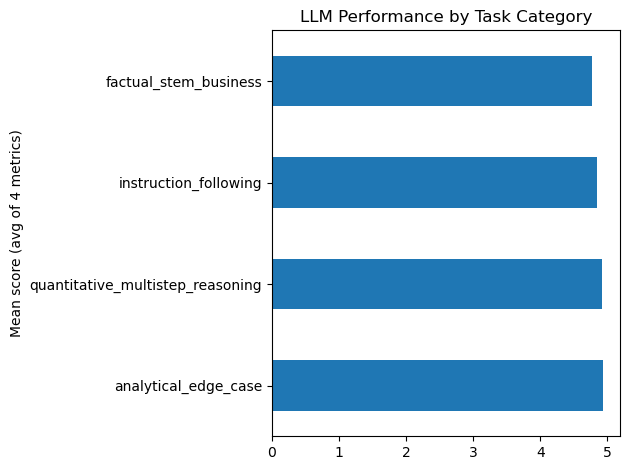

In [15]:
import matplotlib.pyplot as plt

# Category comparison bar chart
cat = category_scores.reset_index().set_index("category")

cat.mean(axis=1).sort_values(ascending=False).plot(kind="barh")

plt.ylabel("Mean score (avg of 4 metrics)")
plt.title("LLM Performance by Task Category")
plt.tight_layout()

plt.savefig(
    "insight_slide.png",
    dpi=300,
    transparent=True
)

plt.show()